# Creating final comparision graphs

### STEPS

- Load all data
    - ref
    - GPT
    - Gemini
- fuse into categories
    - calculate new averages for each category
        - from raw data vs avgs?
- create graphs
    - all in 1 ?
    - separate by "model" ?
        - have reference data in each?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
from dotenv import load_dotenv

load_dotenv()

from config.configuration import DATA_FOLDER_PATH

In [ ]:
ref = pd.read_csv(f"../../{DATA_FOLDER_PATH}/CES_modified_2005.csv")

# GPT
gpt4o_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/averages_GPT-4o.csv")
gpt4o_avg.set_index("#", inplace=True)
gpt4o_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/raw_data_GPT-4o.csv")
gpt4o_raw.set_index("#", inplace=True)

gpt4omini_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/averages_GPT_100.csv")
gpt4omini_avg.set_index("#", inplace=True)
gpt4omini_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/raw_data_GPT_100.csv")
gpt4omini_raw.set_index("#", inplace=True)

gpt35_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/GPT-3.5-turbo_averages.csv")
gpt35_avg.set_index("#", inplace=True)
gpt35_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/GPT-3.5-turbo_raw_data.csv")
gpt35_raw.set_index("#", inplace=True)

# Gemini
gemini_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/Gemini_averages.csv")
gemini_avg.set_index("#", inplace=True)
gemini_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/Gemini_raw_data.csv")
gemini_raw.set_index("#", inplace=True)


In [ ]:
slices = [slice(0, 5), slice(5, 11), slice(11, 16), slice(16, 21), slice(21, 23), slice(23, 27), slice(27, None)]
labels = ["active", "passive", "questionable", "no harm", "downloading", "recycling", "doing good"]

In [6]:
columns = ["GPT-4o", "GPT-4o-mini", "GPT-3.5-turbo", "Gemini", "Students", "Non-students"]
category_averages = pd.DataFrame(index=labels, columns=columns)
category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 0].mean() for s in slices]
category_averages["GPT-4o-mini"] = [gpt4omini_avg.iloc[s, 0].mean() for s in slices]
category_averages["GPT-3.5-turbo"] = [gpt35_avg.iloc[s, 0].mean() for s in slices]
category_averages["Gemini"] = [gemini_avg.iloc[s, 0].mean() for s in slices]
category_averages["Students"] = [ref.iloc[s, 1].mean() for s in slices]
category_averages["Non-students"] = [ref.iloc[s, 2].mean() for s in slices]

category_errors = pd.DataFrame(index=labels, columns=columns)
category_errors["GPT-4o"] = [gpt4o_avg.iloc[s, 1].std() for s in slices]
category_errors["GPT-4o-mini"] = [gpt4omini_avg.iloc[s, 1].std() for s in slices]
category_errors["GPT-3.5-turbo"] = [gpt35_avg.iloc[s, 1].std() for s in slices]
category_errors["Gemini"] = [gemini_avg.iloc[s, 1].std() for s in slices]
# category_errors["Gemini"] = [gemini_raw.groupby("#")["Response"].std().iloc[s].mean() for s in slices]
category_errors["Students"] = 0
category_errors["Non-students"] = 0

category_errors

,GPT-4o,GPT-4o-mini,GPT-3.5-turbo,Gemini,Students,Non-students
active,0.076673,0.000000,0.194391,0.000000,0,0
passive,0.099060,0.231603,0.249592,0.248156,0,0
questionable,0.233854,0.140633,0.220702,0.205971,0,0
no harm,0.165210,0.197151,0.105058,0.211645,0,0
downloading,0.084052,0.000000,0.034646,0.000000,0,0
recycling,0.116674,0.223586,0.232385,0.229898,0,0
doing good,0.211969,0.000000,0.150756,0.000000,0,0


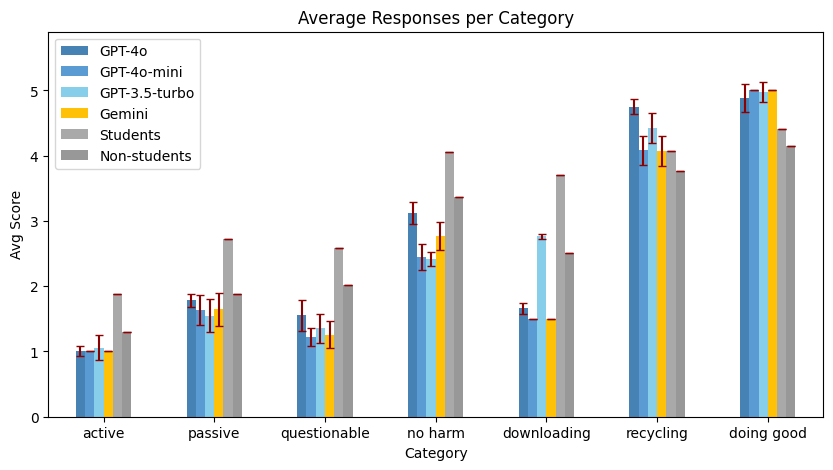

In [8]:
# create plot with error bars 
fig, ax = plt.subplots()
category_averages.plot(
    kind="bar",
    ylim=(0, 5.9),
    yerr=category_errors,
    capsize=3,
    ecolor="darkred",
    color=["#4682b4", "#5a9bd4", "#87ceeb", "#FFC107", "#A9A9A9", "#989898"],
    ax=ax,
    title="Average Responses per Category",
    xlabel="Category",
    ylabel="Avg Score",
    figsize=(10, 5),
    rot=0,
)

fig.savefig("category_averages.png")

<Axes: title={'center': 'Average Responses per Category'}, xlabel='Category', ylabel='Avg Score'>

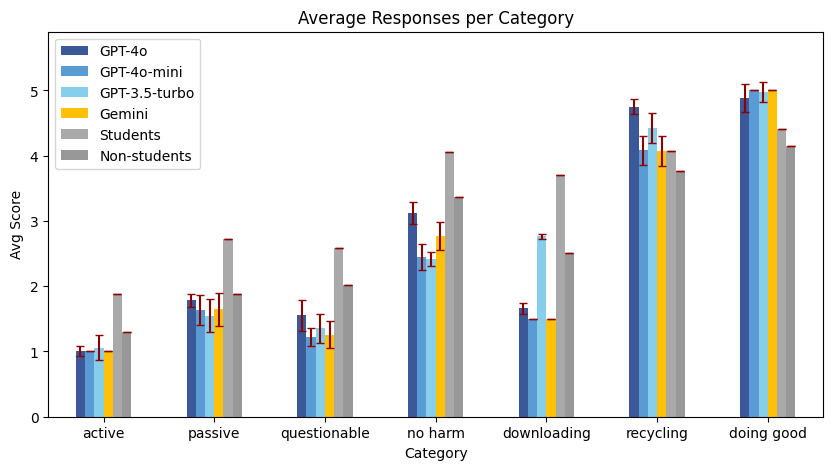

In [9]:

fig, ax = plt.subplots()
category_averages.plot(
    kind="bar",
    ylim=(0, 5.9),
    yerr=category_errors,
    capsize=3,
    ecolor="darkred",
    color=["#3B5998", "#5a9bd4", "#87ceeb", "#FFC107", "#A9A9A9", "#989898"],
    ax=ax,
    title="Average Responses per Category",
    xlabel="Category",
    ylabel="Avg Score",
    figsize=(10, 5),
    rot=0,
)

### testing

In [ ]:
category_averages = pd.DataFrame(index=labels, columns=["GPT-4o", "GPT-100"])
category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 0].mean() for s in slices]
category_averages["GPT-100"] = [gpt4omini_avg.iloc[s, 0].mean() for s in slices]

stacked = pd.DataFrame()
stacked["avg"] = category_averages.stack(future_stack=True)

category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 1].mean() for s in slices]
category_averages["GPT-100"] = [gpt4omini_avg.iloc[s, 1].mean() for s in slices]

stacked["std"] = category_averages.stack(future_stack=True)

stacked.head()

In [ ]:
print(stacked["avg"].unstack())

In [ ]:
active = pd.DataFrame()
active = gpt4o_avg.iloc[slices[0], 0]
print(active)

In [ ]:
# get category averages
active.mean()

In [ ]:
active_raw = pd.DataFrame()
active_raw = gpt4o_raw[gpt4o_raw.index.isin(range(slices[0].start, slices[0].stop + 1))]
print(active_raw)

In [ ]:
active_raw["Answers"].mean()

In [ ]:
gpt4o_raw.head()

In [ ]:
sl = slices[0]
number = 5
print(sl)
print(number in range(sl.start, sl.stop + 1))
print(sl.start)
print(sl.stop)